# Chapter 1 - ARMA Models

## Intro to time series and stationarity

<img src="files/1 ARMA Models/1_1 motivation.png">

<img src="files/1 ARMA Models/1_2 content.png">

<img src="files/1 ARMA Models/1_3 loading.png">

We have set the index as the date column and parse the date into datetime data-type.

<img src="files/1 ARMA Models/1_4 plot.png">

One important feature of time series is its trend
- A positive trend is a line that generally slopes up -> the values increase with time

- A negative trend is where vaues decrease with time

<img src="files/1 ARMA Models/1_5 season.png">

Another important feature is seasonality

A seasonal time series has **patterns that repeat at regular intervals**
 - for example, every weekend

<img src="files/1 ARMA Models/1_6 cycle.png">

In contrast, cyclicality is where there is **_repeating pattern but no fixed time period_**.

### White Noise
- White noise is an important concept in time series and ARIMA models
- It is a series of measurements, where each value is uncorrelated with previous values
- We can think of this like flipping a coin, the outcome of a coin flip dosen't rely on the outcomes of coin flips that came before.
- Similary, with white noise, the series value doesn't depend on the values that came before

<img src="files/1 ARMA Models/1_7.png">

To model a time series, it must be stationary.

**Stationary means that the distribution of the data doesn't change with time.**

For time series to be stationary it must fulfill three criteria:
1. **Trend stationarity: Trend is zero**
    - It isn't growing or shrinking
2. **Variance is constant**
    - The average distance of the data points from the zero line isn't changing.
3. **Autocorrelation is constant**
    - How each value in the time series is related to its neighbors stays the same.

<img src="files/1 ARMA Models/1_8.png">

## Exploration

We will kick off our journey to become an ARIMA master by loading and plotting a time series.

We will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, we are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

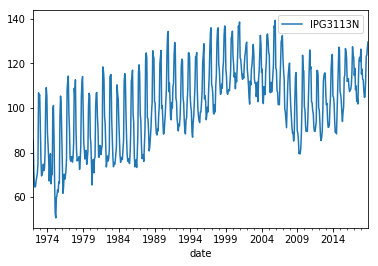

In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv('candy_production.csv', index_col='date', parse_dates=True)

# Plot and show the time series
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

## Train-test splits

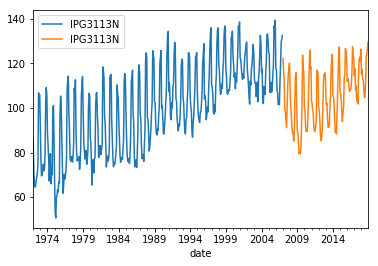

In [2]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets and show them
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

In [3]:
df1 = pd.read_csv('amazon_close.csv', index_col = 'date', parse_dates=True)
df3 = pd.read_csv('earthquakes.csv', usecols = ['date', 'earthquakes_per_year'], index_col = 'date', parse_dates=True)

In [4]:
df3.head()

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0


df1 is a time series of Amazon stock close price. 

Is the Amazon stock close price stationary? To check, we make a quick plot of this DataFrame.

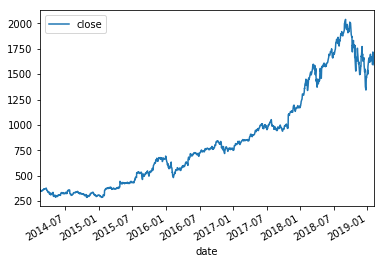

In [5]:
df1.plot()
plt.show()

No it is not stationary, because it has a trend.

This is a time series of the return (percentage increase of price per day) of Amazon stock. 
<img src="files/1 ARMA Models/1_9.png">

Check if it is stationary.

No, because the variance changes with time.

The DataFrame, df3 is a time series showing the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater).

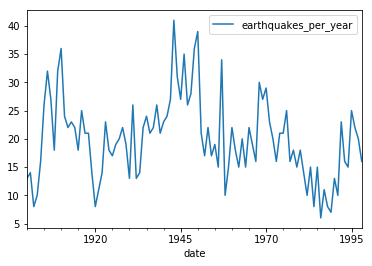

In [6]:
df3.plot()
plt.show()

- There is no visible trend --> There is no slope up or down
- The variance is the same with time. The shock terms or jumps appear to be the same size throughout the time series
- The dynamics change with time.? --> This is very difficult to tell by eye. Check if you can clearly identify regions where the time series behaves very differently?

The above time series is stationary

## Making time series stationary

Last time we learned about ways in which a time series can be non-stationary and how we can identify it by plotting.

However, there are more formal ways of accomplishing this task:
 - _Statistical tests for stationarity_
 - _Making a dataset stationary_ -> There are ways to transform non-stationary time series into stationary time ones.

### The augmented Dicky-Fuller test
- Tests for trend non-stationarity
- Statistical Test. Null Hypothesis --> time series is non-stationary due to trend

<img src="files/1 ARMA Models/1_10.png">

We can implement the augmented Dicky-Fuller test using statsmodel

<img src="files/1 ARMA Models/1_10_1.png">

The last item (4th) in the tuple is a dictionary. This stores the critical values of the test statistic which equates to different p-values.

### The value of plotting

- Plotting time series can stop you from making wrong assumptions.

<img src = "1 ARMA Models/1_10_2.png">

- In the above figure, the time series behavior clearly changes and is non stationary; It passes the Dicky-Fuller test.

<img src="files/1 ARMA Models/1_11.png">

- We need to transform the data into a stationary form before we can model it.
- We can think of this a bit like feature engineering in classic machine learning.

- Let's start with a non-stationary dataset.
<img src="files/1 ARMA Models/1_12.png">
    - Here is an example of the population of a city. 
    
- One very common way to make a time series stationary is to take its difference
- This is where, from each value in our time series we subtract the previous value. $Difference: \Delta y_{t} = y_{t-1}$

- We can do this using the ```.diff()``` method of the pandas dataframe
<img src="files/1 ARMA Models/1_12a.png">

- Notice that this gives one NaN value at the start since there is no previous value to subtract from it.
- We can get rid of this using the ```.dropna()``` method. ```df_stationary = df.diff().dropna()```
- Here is the time series after differencing
<img src="files/1 ARMA Models/1_12b.png">

- This time, taking the differene was wnough to make it stationary, but for other time series we may need to take the difference more than once.

- Sometimes we may need to perform other transformations to make the time series stationary. 
<img src="files/1 ARMA Models/1_12c.png">



### Augmented Dicky-Fuller

In this exercise we will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

We have earlier loaded the earthquakes dataset as df3

In [10]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller
earthquake = df3
# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


Earth shaking effort! You can reject the null hypothesis that the time series is non-stationary. Therefore it is stationary. You probably could have intuited this from looking at the graph or by knowing a little about geology. The time series covers only about 100 years which is a very short time on a geological time scale.

### Intro to AR, MA and ARMA models